<a href="https://colab.research.google.com/github/wojciechnowaczyk/Statystyka/blob/main/Korelacja_i_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

Zadanie 1. Dla 15 gospodarstw domowych 4-osobowych zebrano informacje o przychodach miesięcznych (w zł/1 osobę) i wysokości wydatków na utrzymanie mieszkania (w zł/1osobę ) w I półroczu 2022 r.

Y – wydatki na utrzymanie mieszkania w przeliczeniu na 1 osobę.

X – przychody miesięczne w zł / 1 osobę.

Określ siłę i kierunek zależności między tymi zmiennymi.
Jeżeli zmienne są skorelowane, to
- znajdź funkcję regresji,
- zinterpretuj współczynnik regresji,
- sporządź wykres danych źródłowych i funkcji regresji,
- oceń jakość oszacowanej funkcji regresji,
- podaj prognozę wydatków na utrzymanie mieszkania, jeżeli przychody miesięczne na osobę wyniosą 2900 zł.

In [9]:
X = [2594, 2450, 2395, 2520, 2648, 2695, 2825, 2800, 2687, 2650, 2430, 2874, 2808, 2609, 2765]
Y = [580, 480, 420, 620, 700, 750, 950, 920, 660, 720, 450, 880, 850, 650, 740]
upkeep_cost_df = pd.DataFrame({'income': X, 'expense': Y})
upkeep_cost_df


,income,expense
0,2594,580
1,2450,480
2,2395,420
3,2520,620
4,2648,700
5,2695,750
6,2825,950
7,2800,920
8,2687,660
9,2650,720


In [12]:
# korelacja liniowa
income_avg = upkeep_cost_df['income'].mean()
expense_avg = upkeep_cost_df['expense'].mean()
#odchylenia
upkeep_cost_df['income_diff'] = upkeep_cost_df['income'] - income_avg
upkeep_cost_df['expense_diff'] = upkeep_cost_df['expense'] - expense_avg
upkeep_cost_df


,income,expense,income_diff,expense_diff
0,2594,580,-56.0,-111.333333
1,2450,480,-200.0,-211.333333
2,2395,420,-255.0,-271.333333
3,2520,620,-130.0,-71.333333
4,2648,700,-2.0,8.666667
5,2695,750,45.0,58.666667
6,2825,950,175.0,258.666667
7,2800,920,150.0,228.666667
8,2687,660,37.0,-31.333333
9,2650,720,0.0,28.666667


In [13]:
#korelacja
correlation = sum(upkeep_cost_df['income_diff'] * upkeep_cost_df['expense_diff']) / (
    sum(upkeep_cost_df['income_diff'] ** 2)*sum(upkeep_cost_df['expense_diff']**2)
)**0.5
correlation

0.9584246651529627

Wzrostowi dochodu na jedną osobę w rodzinie towarzyszy wzrost wydatków mieszkaniowych. Korelacja musi mieć wartośc pomiędzy -1, a 1.

Text(0, 0.5, 'expense')

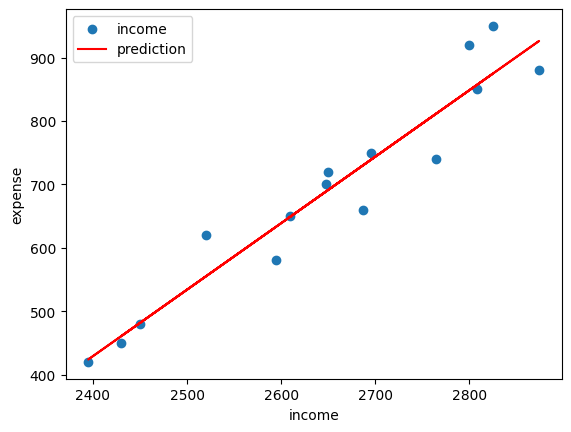

In [23]:
a = sum(upkeep_cost_df['income_diff'] * upkeep_cost_df['expense_diff'])/sum(upkeep_cost_df['income_diff']**2)
b = expense_avg - a*income_avg

#prognozy
upkeep_cost_df['prediction'] = a*upkeep_cost_df['income'] + b

#wykres
plt.scatter(upkeep_cost_df['income'], upkeep_cost_df['expense'], label='income')
plt.plot(upkeep_cost_df['income'], upkeep_cost_df['prediction'], color='red', label='prediction')
plt.legend()
plt.xlabel('income')
plt.ylabel('expense')

Wzrostowi dochodu o jeden złoty towarzyszy wzrost wydatków mieszkaniowych o 0.5 zł.

In [24]:
#prognoza
a*2900+b

np.float64(953.5821850034895)

In [28]:
upkeep_cost_df = sm.add_constant(upkeep_cost_df)
model = sm.OLS(upkeep_cost_df['expense'], upkeep_cost_df[['const', 'income']])
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                expense   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           1.87e-08
Time:                        16:11:45   Log-Likelihood:                -78.589
No. Observations:                  15   AIC:                             161.2
Df Residuals:                      13   BIC:                             162.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2088.5045    229.890     -9.085      0.000   -2585.151   -1591.858
income         1.0490      0.087     12.110      0.000       0.862       1.236
==============================================================================
Omnibus:                        0.336   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.472
Skew:                           0.087   Prob(JB):                        0.790
Kurtosis:                       2.148   Cond. No.                     4.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#ocena dobroci dopasowania funkcji regresji
#odchylenie standardowe składnika resztowego
upkeep_cost_df['residuals'] = upkeep_cost_df['expense'] - upkeep_cost_df['prediction']
residuals_std = (sum(upkeep_cost_df['residuals']**2)/(len(upkeep_cost_df)-2))**0.5x

49.00163683026015

Zadanie 2. Pewne biuro obrotu nieruchomościami w Poznaniu oferowało na sprzedaż w dniu 1.12.2022 r. 25 mieszkań. Dane odnośnie ich powierzchni i ceny przedstawiono w ramce offer_df.
Określ siłę i kierunek zależności między tymi zmiennymi. Jeżeli zmienne są skorelowane, to
- znajdź funkcję regresji, zinterpretuj współczynnik regresji, sporządź wykres danych źródłowych i funkcji regresji, oceń jakość oszacowanej funkcji regresji,
- podaj prognozę ceny za m2 w przypadku, gdy mieszkanie będzie miało 85 m2.

In [ ]:
surface = [80, 67, 87, 87, 85, 36, 46, 63, 95, 140, 38, 30, 30, 61, 47, 30, 38, 50, 81, 33, 38, 38, 30, 38, 38] # w m2
price = [825, 710, 910, 945, 920, 480, 510, 605, 1100, 1390, 420, 410, 290, 620, 545, 320, 450, 590, 890, 420, 420, 450, 420, 410, 430] # w tys. zł
offer_df = pd.DataFrame({'surface': surface, 'price': price})
offer_df
